# Exaple 2: learning how to use gravity models

PyAAT has several gravity models for Planets available. For the Earth, ir has three models:

1- Vertical constant;

2- Newton Model;

3- High Order model;

All three models provide the matrix form for gravity vector as a function of the altitude [meters], latitude [radians] and longitude [radians].

The gravity vector takes the form $\vec{g}$ = [$g_\theta ~~ g_\phi ~~g_r$]). Where $g_\theta$, $g_\phi$, $g_r$ point in the direction of the longitude, co-latitude and center of the Earth, respectivelly.

### Import gravity models

In [2]:
from pyaat.gravity import Earth_VerticalConstant, Earth_NewtonGravity, Earth_highOrder

### Compare the gravity models at sea level, 45 $^o$ of latitude and 0 $^o$ of longitude. 

In [3]:
from numpy import arange, radians, degrees

In [4]:
g1 = Earth_VerticalConstant()
g2 = Earth_NewtonGravity()
g3 = Earth_highOrder()

g1.set_altitude(0.0)
g2.set_altitude(0.0)
g3.set_altitude(0.0)
g3.set_latitude(radians(45))

print('Vertical constant')
print(g1.get_gravity())
print('-------------------------')
print('Newton gravity (sphere)')
print(g2.get_gravity())
print('-------------------------')
print('High order model')
print(g3.get_gravity())

Vertical constant
[0.      0.      9.80665]
-------------------------
Newton gravity (sphere)
[0.         0.         9.79870642]
-------------------------
High order model
[0.         0.01590368 9.79074518]


### Example 3.1 from A. Tewary, Atmospheric ans Space Flight Dynamics, Boston: Birkhauser, 2007.

Example 3.1. Construct a model of the earth’s gravity using the ﬁrst four Jeﬀery’s constants in the series expansion of gravitational potential. Compare the acceleration due to gravity with that of the spherical earth model (R = Re = 6378.14 km) for a trajectory in which the latitude (in degrees) varies, with altitude, h = r − R e (in kilometers), as follows: lat = h − 100, (0 ≤ h ≤ 200 km)

In [5]:
hlist = arange(0,200,1)
g = []
gb = []
latlist = []
for h in hlist:
    lat = radians(h-100)
    g3.set_altitude(h*1000)
    g2.set_altitude(h*1000)
    g3.set_latitude(lat)
    g.append(g3.get_gravity()[2])
    gb.append(g2.get_gravity()[2])
    latlist.append(degrees(lat))

In [6]:
import matplotlib.pyplot as plt

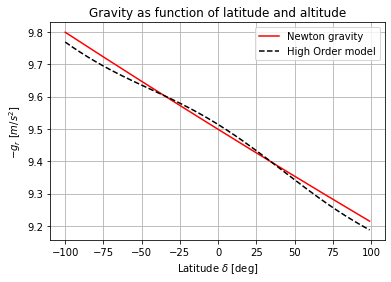

In [7]:
plt.figure()
plt.plot(latlist,gb, label ='Newton gravity', color = 'r', linestyle='-')
plt.plot(latlist,g, label='High Order model', color='k', linestyle = '--')
plt.ylabel('$-g_r$ [$m/s^2$]')
plt.xlabel('Latitude $\delta$ [deg]')
plt.title('Gravity as function of latitude and altitude')
plt.legend()
plt.grid()
plt.show()